# Exploración inicial de los datos y tratamiento de estos.

In [38]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Vigilar progreso bucles
# -----------------------------------------------------------------------
from tqdm import tqdm

# Gestionar los warnings
# -----------------------------------------------------------------------
import warnings

# modificar el path
# -----------------------------------------------------------------------
import sys
sys.path.append("..")

# importar funciones de soporte
# -----------------------------------------------------------------------
from src import soporte_preprocesamiento as sup_prep
from src import soporte_nulos as sup_nul

##aplicar configuraciones
#------------------------------------------------------------------------
warnings.filterwarnings('ignore')
pd.set_option('display.max_info_columns', 50)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format) #eliminamos la notacion cientifica

tqdm.pandas()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---

## Importamos los datos

In [39]:
df = pd.read_csv('../datos/api_rent_madrid.csv', sep=';')
df.sample()

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
421,98911067,18,625.00,flat,rent,51.00,True,1,1,Avenida de Atenas,Madrid,Arganda,es,402.983.085,-34.522.637,False,25010,SE ALQUILA precioso piso muy luminoso. Este p...,True,good,False,12.00,{'typology': 'flat'},"{'subtitle': 'Centro, Arganda', 'title': 'Piso...",False,False,False,False,False,False,10996,2,Centro,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN


---

## Lo primero de todo, vemos si tenemos duplicados y si es así, los eliminamos.

In [40]:
df.duplicated().sum()

8

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.duplicated().sum()

0

---

## Reaizamos una primera exploración sobre los datos que tenemos.

In [43]:
sup_prep.exploracion_datos(df, info=False)

El número de filas es 442 y el número de columnas es 38

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
propertyCode,442.00,94573262.11,13974749.91,666696.00,97550391.50,98662647.00,98894324.25,98939685.00
numPhotos,442.00,21.85,9.66,0.00,15.00,21.00,28.00,72.00
price,442.00,672.96,83.96,340.00,645.00,700.00,740.00,750.00
size,442.00,67.96,35.87,20.00,46.25,62.00,80.00,371.00
rooms,442.00,1.70,0.98,0.00,1.00,2.00,2.00,6.00
bathrooms,442.00,1.21,0.44,1.00,1.00,1.00,1.00,3.00
distance,442.00,22266.39,16991.27,183.00,7089.00,20001.00,34854.75,59919.00
priceByArea,424.00,11.95,5.37,1.00,8.00,11.00,15.00,33.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
propertyType,442,6,flat,348
operation,442,1,rent,442
address,442,405,"Calle Valle de Ambles, 2",7
province,442,5,Madrid,353
municipality,442,96,Madrid,170
country,442,1,es,442
latitude,442,433,404.430.651,7
longitude,442,433,-34.659.877,7
description,441,427,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,7
hasVideo,424,2,False,306



----------

Los columnas con valores nulos y sus porcentajes son: 


,%_nulos
newDevelopmentFinished,97.06
labels,93.21
parkingSpace,69.68
neighborhood,60.63
district,24.66
externalReference,23.53
floor,18.33
hasLift,7.01
superTopHighlight,4.07
topNewDevelopment,4.07


### Vamos a verlo mejor mediante visualizaciones

8it [00:00, 20.85it/s]


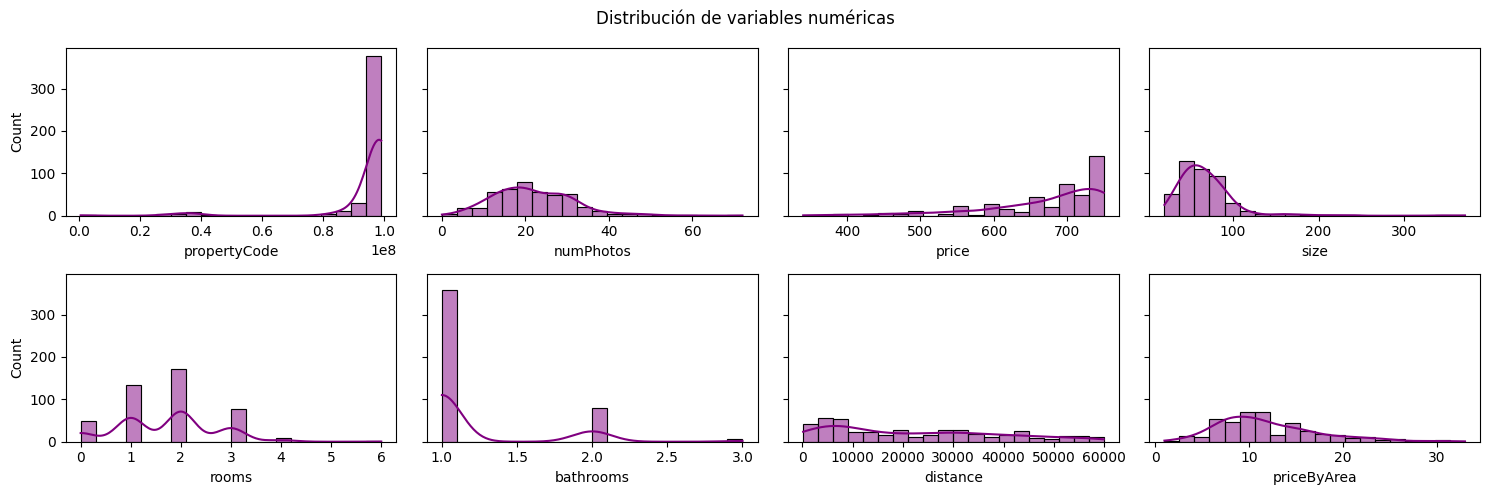

In [44]:
visualizador = sup_prep.Visualizador(df)
visualizador.plot_numericas(color='purple', kde=True)

---

## Dada que nuestra variable respuesta es **'price'**, voy a ver que valores tengo en algunas de las variables (principalmente categoricas) que apriori, considero que pueden tener relación con nuestra variable respuesta en caso de que haya que cambiar el formato o limpiarlas y son:
### (las variables numericas ya hemos visto mediante el .describe() y la visualización que de primeras, no tenemos datos raros)

- ```propertyType``` (Tipo de propiedad)
- ```district``` (Distrito donde se encuentra la propiedad)
- ```neighborhood``` ( Barrio dentro del distrito)

In [47]:
df['propertyType'].unique()

array(['chalet', 'flat', 'penthouse', 'studio', 'duplex', 'countryHouse'],
      dtype=object)

In [48]:
df['district'].unique()

array([nan, 'Hortaleza', 'Centro Urbano', 'Puente de Vallecas',
       'Ciudad Lineal', 'Casco Antiguo', 'Moncloa', 'Centro',
       'Centro - Casco Histórico', 'Retiro', 'Arganzuela', 'Latina',
       'Barrio de Salamanca', 'Bulevar - Plaza Castilla', 'La Estación',
       'Barajas', 'Las Matas- Peñascales',
       'San Roque-Concordia-Adoratrices', 'Chamberí', 'Villaverde',
       'La Dehesa - El Pinar', 'Seseña Nuevo', 'Reyes Católicos',
       'Chorrillo', 'Valdepelayo - Montepinos - Arroyo Culebro',
       'Valleaguado - La Cañada', 'Suroeste',
       'San Isidro - Los Almendros', 'San José - Buenos Aires',
       'Hospital', 'Parque de la Coruña - Las Suertes',
       'Valderas - Los Castillos', 'Getafe Centro', 'San Blas', 'Val',
       'Casco Urbano', 'Casco Histórico', 'Los Llanos - Valle Pardo',
       'Ensanche', 'Dehesa - El Soto', 'El Vallejo', 'Pintores-Ferial',
       'Carabanchel', 'Zona Estación- Centro', 'Tetuán', 'El Quiñón',
       'Constitución-El Balconcillo', 'Va